### **Download Dataset**

In [ ]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-11-14 22:05:26--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [             <=>    ] 879.65M  5.35MB/s    in 97s     

2024-11-14 22:07:03 (9.10 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [ ]:
!gunzip SUSY.csv.gz

In [ ]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

In [ ]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Nov 12 14:25 sample_data
-rw-r--r-- 1 root root 2.3G Nov 14 22:07 SUSY.csv


In [ ]:
!wc -l SUSY.csv

5000000 SUSY.csv


In [ ]:
!head -500000 SUSY.csv > SUSY-small.csv

In [ ]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Nov 12 14:25 sample_data/
-rw-r--r-- 1 root root 2.3G Nov 14 22:07 SUSY.csv
-rw-r--r-- 1 root root 228M Nov 14 22:09 SUSY-small.csv


In [ ]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


In [ ]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [ ]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta",
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

### **Exercise 3**

In [ ]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

In [ ]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]

In [ ]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

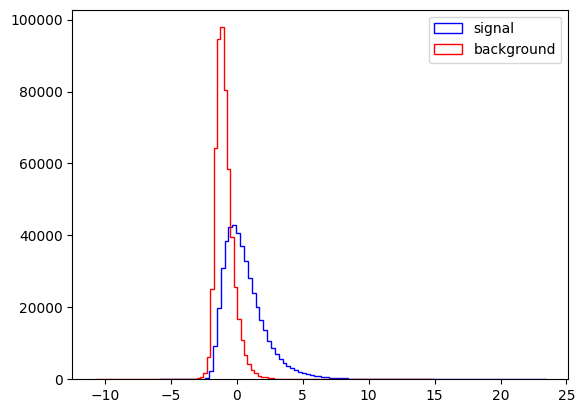

In [ ]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

### **Part a**

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

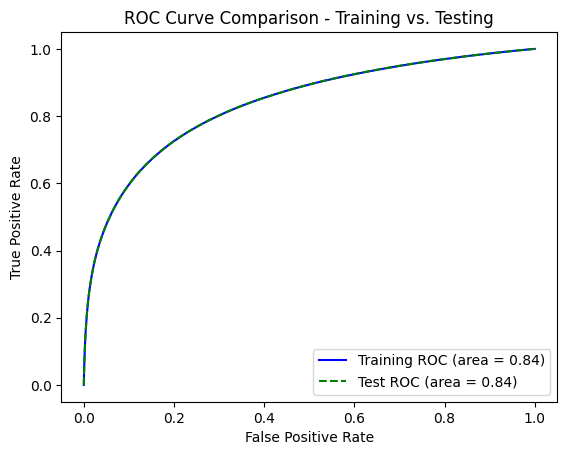

In [15]:
from sklearn.metrics import roc_curve, auc

# Compute decision function
y_train_scores = Fisher.decision_function(X_Train)
y_test_scores = Fisher.decision_function(X_Test)

# Compute ROC for training data
fpr_train, tpr_train, _ = roc_curve(y_Train, y_train_scores)
roc_auc_train = auc(fpr_train, tpr_train)

# Compute ROC for testing data
fpr_test, tpr_test, _ = roc_curve(y_Test, y_test_scores)
roc_auc_test = auc(fpr_test, tpr_test)

# Plot ROC curves
plt.figure()
plt.plot(fpr_train, tpr_train, color='blue', label=f'Training ROC (area = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', linestyle='--', label=f'Test ROC (area = {roc_auc_test:.2f})')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison - Training vs. Testing")
plt.legend(loc='lower right')
plt.show()

### **Part b**

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot.

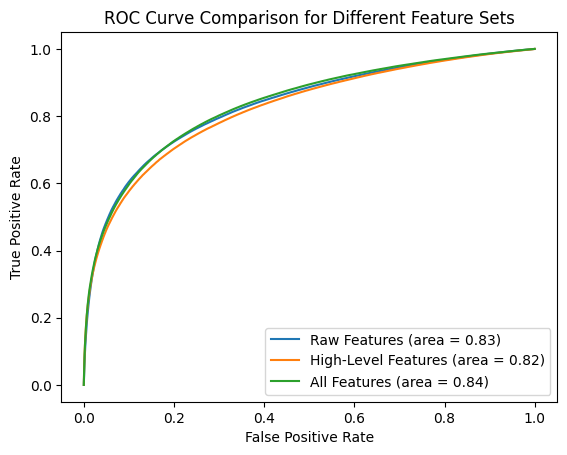

In [16]:
raw_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
high_level_features = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
all_features = raw_features + high_level_features

# Train and evaluate the model for each feature set
for feature_set, label in zip([raw_features, high_level_features, all_features],
                              ["Raw Features", "High-Level Features", "All Features"]):
    X_Train_set = Train_Sample[feature_set]
    X_Test_set = Test_Sample[feature_set]

    # Train model
    Fisher.fit(X_Train_set, y_Train)
    y_test_scores = Fisher.decision_function(X_Test_set)

    # Compute ROC curve for this feature set
    fpr, tpr, _ = roc_curve(y_Test, y_test_scores)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for this feature set
    plt.plot(fpr, tpr, label=f'{label} (area = {roc_auc:.2f})')

# Finalize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Different Feature Sets")
plt.legend(loc='lower right')
plt.show()

### **Exercise 4**

### **Part a**

Select 3 different classifiers from the techniques listed here to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.

In [17]:
# Reduce the training set to the first 300,000 samples
from sklearn.ensemble import RandomForestClassifier

N_Train_Small = 300000
Train_Sample_Small = df[:N_Train_Small]
X_Train_Small = Train_Sample_Small[VarNames[1:]]
y_Train_Small = Train_Sample_Small["signal"]

rf = RandomForestClassifier(n_estimators=50, max_depth = 10, random_state=42)
rf.fit(X_Train_Small, y_Train_Small)
y_test_rf_scores = rf.predict_proba(X_Test)[:, 1]  # Probability of the positive class

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt.fit(X_Train_Small, y_Train_Small)
y_test_dt_scores = dt.predict_proba(X_Test)[:, 1]  # Probability of the positive class


In [19]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Initialize the HistGradientBoostingClassifier
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=10, random_state=42)

# Train on the reduced training set
hgbc.fit(X_Train_Small, y_Train_Small)

# Predict probabilities on the test set
y_test_hgbc_scores = hgbc.predict_proba(X_Test)[:, 1]  # Probability of the positive class

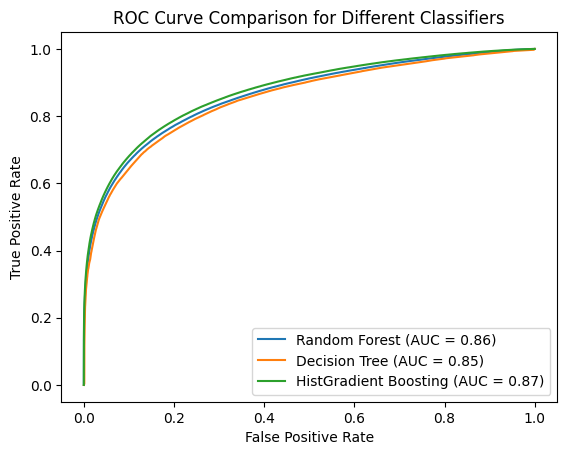

In [20]:
# Add Decision Tree to the classifiers dictionary
classifiers = {
    "Random Forest": y_test_rf_scores,
    "Decision Tree": y_test_dt_scores,
    "HistGradient Boosting": y_test_hgbc_scores
}

# Plot ROC curves for each classifier
plt.figure()
for name, y_scores in classifiers.items():
    fpr, tpr, _ = roc_curve(y_Test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison for Different Classifiers")
plt.legend(loc='lower right')
plt.show()

### **Part b**

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.

Random Forest:


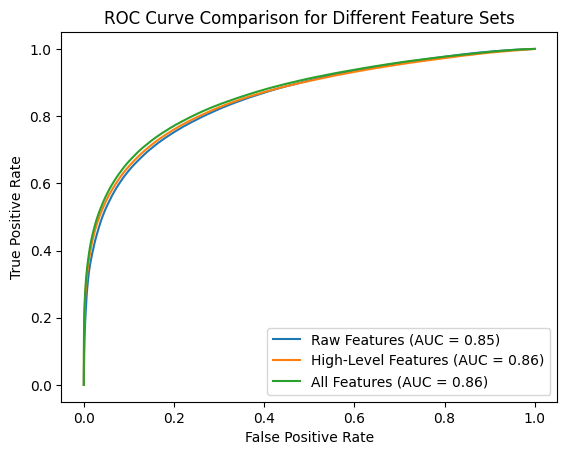

Decision Tree:


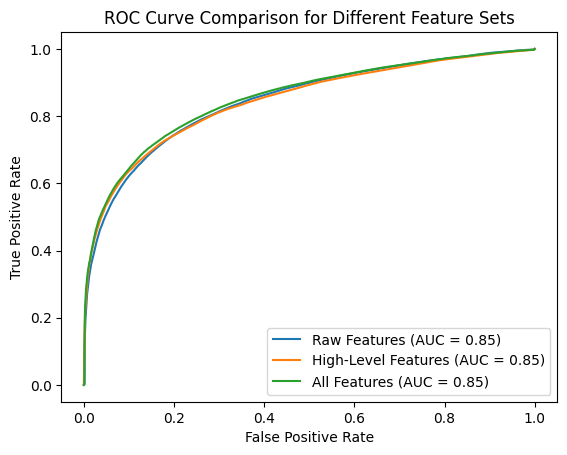

HistGradient Boosting:


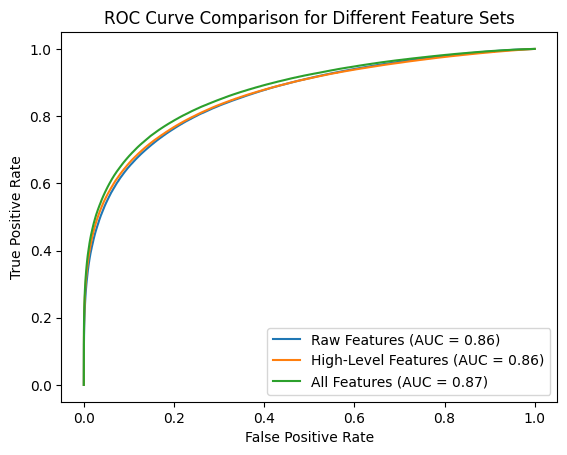

In [21]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define feature sets
raw_features = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
high_level_features = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
all_features = raw_features + high_level_features

def compare_classifier_by_features(classifier, Train_Sample, Test_Sample, y_Train, y_Test):
    """
    Trains a classifier with different feature sets and plots ROC curves for comparison.

    Parameters:
    - classifier: An instantiated, untrained classifier (e.g., RandomForestClassifier())
    - Train_Sample: DataFrame of training data
    - Test_Sample: DataFrame of testing data
    - y_Train: Training labels
    - y_Test: Testing labels
    """
    feature_sets = {
        "Raw Features": raw_features,
        "High-Level Features": high_level_features,
        "All Features": all_features
    }

    plt.figure()

    for label, features in feature_sets.items():
        # Prepare training and testing sets for the current feature set
        X_Train_set = Train_Sample[features]
        X_Test_set = Test_Sample[features]

        # Train the classifier on the specified feature set
        classifier.fit(X_Train_set, y_Train)
        y_test_scores = classifier.predict_proba(X_Test_set)[:, 1]  # Probability of the positive class

        # Compute ROC curve and AUC
        fpr, tpr, _ = roc_curve(y_Test, y_test_scores)
        roc_auc = auc(fpr, tpr)

        # Plot ROC curve for the current feature set
        plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

    # Finalize the plot
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison for Different Feature Sets")
    plt.legend(loc='lower right')
    plt.show()

rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
hgbc = HistGradientBoostingClassifier(max_iter=100, learning_rate=0.1, max_depth=10, random_state=42)

# Run comparisons
print("Random Forest:")
compare_classifier_by_features(rf, Train_Sample_Small, Test_Sample, y_Train_Small, y_Test)

print("Decision Tree:")
compare_classifier_by_features(dt, Train_Sample_Small, Test_Sample, y_Train_Small, y_Test)

print("HistGradient Boosting:")
compare_classifier_by_features(hgbc, Train_Sample_Small, Test_Sample, y_Train_Small, y_Test)


### **Part c**

In [22]:
from sklearn.metrics import roc_auc_score

# Calculate AUC for each classifier
auc_scores = {name: roc_auc_score(y_Test, scores) for name, scores in classifiers.items()}

# Identify the classifier with the highest AUC score
best_classifier_name = max(auc_scores, key=auc_scores.get)
print(f"Best classifier based on AUC: {best_classifier_name}")

# Retrieve the scores of the best classifier
best_y_test_scores = classifiers[best_classifier_name]


Best classifier based on AUC: HistGradient Boosting


In [29]:
import numpy as np

def compute_maximal_significance(y_test_scores, y_test_true, N_signal_total, N_background_total):
    best_significance = 0
    best_threshold = 0

    # Iterate over a range of thresholds
    for threshold in np.linspace(0, 1, 100):
        # Predictions based on threshold
        y_pred = (y_test_scores >= threshold).astype(int)

        # Calculate true positives (signal) and false positives (background)
        TP = np.sum((y_pred == 1) & (y_test_true == 1))
        FP = np.sum((y_pred == 1) & (y_test_true == 0))

        # Scale predictions to full dataset
        N_signal_pass = TP * (N_signal_total / len(y_test_true))
        N_background_pass = FP * (N_background_total / len(y_test_true))

        # Compute significance (simple approximation: S / sqrt(S + B))
        if N_signal_pass + N_background_pass > 0:
            significance = N_signal_pass / np.sqrt(N_signal_pass + N_background_pass)
            if significance > best_significance:
                best_significance = significance
                best_threshold = threshold

    return best_significance, best_threshold


N_signal_total = 300000
N_background_total = 300000

max_significance, optimal_threshold = compute_maximal_significance(
    best_y_test_scores, y_Test, N_signal_total, N_background_total
)

print(f"Maximal significance: {max_significance:.2f} at threshold: {optimal_threshold:.2f}")

Maximal significance: 288.48 at threshold: 0.36


### **Exercise 5**

### **Part a**

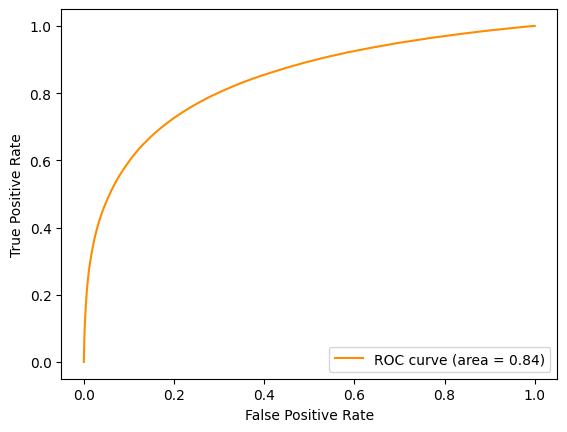

In [28]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

### **Part b**

In [30]:
from sklearn.metrics import roc_curve, auc, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
import pandas as pd

# Compute TPR, FPR, and ROC AUC
fpr, tpr, thresholds = roc_curve(y_Test, best_y_test_scores)
roc_auc = auc(fpr, tpr)

# Use optimal threshold to make predictions
y_pred_optimal = (best_y_test_scores >= optimal_threshold).astype(int)

# Compute confusion matrix components
tn, fp, fn, tp = confusion_matrix(y_Test, y_pred_optimal).ravel()

# Calculate additional metrics using scikit-learn functions
precision = precision_score(y_Test, y_pred_optimal)
recall = recall_score(y_Test, y_pred_optimal)
f1 = f1_score(y_Test, y_pred_optimal)
accuracy = accuracy_score(y_Test, y_pred_optimal)

# Maximal significance is already computed
max_significance = max_significance

metrics_table = pd.DataFrame({
    "Metric": ["True Positive Rate (TPR)", "False Positive Rate (FPR)", "ROC AUC", "Precision", "Recall", "F1 Score", "Accuracy", "Maximal Significance"],
    "Value": [tpr.mean(), fpr.mean(), roc_auc, precision, recall, f1, accuracy, max_significance]
})


print(metrics_table)


                      Metric       Value
0   True Positive Rate (TPR)    0.763996
1  False Positive Rate (FPR)    0.296467
2                    ROC AUC    0.874778
3                  Precision    0.755987
4                     Recall    0.800752
5                   F1 Score    0.777726
6                   Accuracy    0.790262
7       Maximal Significance  288.476147
